<a href="https://colab.research.google.com/github/igoradriano/Manipulacao_DataFrame/blob/main/DesafioBemol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. IMPORTANDO BIBLIOTECAS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **0.1 FUNÇÕES IMPORTANTES**


# Gráfico em pizza

In [ ]:
def plotar_grafico_pizza(df,ocorr,lab,x=2,explode=[],title='TITULO'):
  fig = plt.figure(figsize=(10,7))
  ax1 = fig.add_subplot(111)
  ocorrencia = []
  labels = []
  for i in df.index: 
      if i > x:
        break
      else:
        ocorrencia.append(df[ocorr][i])
        labels.append(df[lab][i])
        

  if len(explode) == 0:
    for i in df.index:
      if i > x:
        break
      else:
        explode.append(i*0.05)
          

  cores = ['lightblue', 'green', 'yellow', 'red']
  total = sum(ocorrencia)
  plt.pie(ocorrencia, explode=explode, labels=labels, colors=cores, autopct=lambda p: f'{(p * total / 100):.2f}%', shadow=True, startangle=90)
  plt.axis('equal') 
  # Cria um título para o gráfico
  ax1.set_title(title, fontsize=15) 
  ax1.legend(bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure) #legenda em posicao especifica
  
  plt.show()

# Gráfico de Dispersão

In [ ]:
def grafico_dispersao(df1,df2,ocorr,lab,title):
   #fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(13, 5)) define a quantidade de gráficos em suplot
   fig = plt.figure(figsize=(15,15))
   axes = fig.add_subplot(111)
   x1 = []
   y1 = []
   x2 = []
   y2 = []
   explode = []
   for i in df_deb.index:
     x1.append(df1[ocorr][i])
     y1.append(df1[lab][i])
   for i in df_cred.index:
     x2.append(df2[ocorr][i])
     y2.append(df2[lab][i])
           
   # cria rótulo no eixo x
   axes.set_xlabel( 'Data da Movimentação', color='b')
   # cria rótulo no eixo y
   axes.set_ylabel( 'Valor Movimentado (BRL)', color='b') 
   # Cria um título para o gráfico
   axes.set_title(title) 

   #PRIMEIRO GRÁFICO
   axes.scatter(x1,y1,color='green',s=5,edgecolor='none')
   #deixa os eixos quadrados
   axes.set_aspect(1./axes.get_data_ratio()) 

   #SEGUNDO GRÁFICO
   axes.scatter(x2,y2,color='red',s=5,edgecolor='none')
   #deixa os eixos quadrados
   axes.set_aspect(1./axes.get_data_ratio())
 

   plt.show()
   

# Gráfico em Barras

In [ ]:
def grafico_barras(df, ocorr, lab, lab2):
  x = []
  y = []
  z = []
  w = []
  a = []
  for i in df.index: 
      if i > 5:
        break
      else:
        #cria os dados
        x.append(df[ocorr][i])
        y.append(df[lab][i])
        z.append(df[lab2][i])
        w.append(df[lab][i] + df[lab][i])
        a.append(df[lab][i]/(df[lab][i] + df[lab2][i]) )

      
  #cria a figura e o eixo
  fig = plt.figure(figsize=(10,7))
  ax1 = fig.add_subplot(111)

  def plot_bar(x, vals, width= 0.8):
    n = len(vals)
    _x = np.arange(len(x))
    for i in range(n):
        ax1.bar(_x - width/2. + i / float(n) * width, vals[i], width=width/float(n), align="edge")
    plt.xticks(_x, x)

  ax1.set_ylabel( 'Valor Movimentado (BRL)', color='b') #cria o rótula do primeiro eixo
  plot_bar(x, [z,y])
  ax2 = ax1.twinx() # cria o segundo eixo
  plt.legend()
  
  ax2.set_ylabel('média', color='b') #cria o rótula do segundo eixo
  ax2.plot(a, color='b')
  ax2.tick_params(axis='y', labelcolor='b')


  plt.show()

# Gráfico de Linhas

In [ ]:
def grafico_linhas(df, titulo='TITULO',xlabel="X",ylabel="Y"): 
  fig = plt.figure(figsize=(10,7))
  ax1 = fig.add_subplot(111)

  todasLinhas = df.values.tolist()
  x = df.columns.values
  x = x[1:6]
  for linha in todasLinhas:
    plt.plot(x,linha[1:6], label= linha[0] )
  #plt.ylim(0, 100000)  define o intervalo do eixo y
  #plt.yticks(np.linspace(0, 10, 500, endpoint=True)) # Define as marcas em y
  plt.title(titulo,fontsize=15)
  plt.xlabel(xlabel,fontsize=13)
  plt.ylabel(ylabel,fontsize=13)
  plt.legend()
  plt.show()


# **1. MANIPULAÇÃO DE DADOS**
Desafio Bemol Data Analyst


In [ ]:
df_clientes = pd.read_csv('Dados_vale_credito_tabela1.csv', sep=',', skiprows=0, encoding='utf-8')
df_transacoes = pd.read_csv('Dados_vale_credito_tabela2.csv', sep=',', skiprows=0, encoding='utf-8')

In [ ]:
df_clientes.sort_values(['CLIENTE'], ascending =[True] )


,CLIENTE,IDNIVEL,DESCRICAO_NIVEL,SALDO_VC,DT_MUDANCA_PEDRA
213,146,5,DIAMANTE+,1.54,2020-06-18
221,1791,3,OURO,0.85,2020-05-31
224,2515,3,OURO,17.57,2020-05-18
226,2784,4,DIAMANTE,2.24,2020-06-12
160,4975,5,DIAMANTE+,2.45,2020-05-30
...,...,...,...,...,...
574,2059263,3,OURO,2.74,2020-06-27
578,2231420,5,DIAMANTE+,0.52,2020-06-10
503,2231495,3,OURO,0.65,2020-05-22
579,2523520,3,OURO,0.70,2020-07-02


In [ ]:
df_transacoes.sort_values(['CLIENTE'] ,ascending = [True])

,CLIENTE,DEBITO_OU_CREDITO,TIPO_TRANSACAO_VC,ID_LISTA_PRESENTES,PEDIDO_BOL,VALOR_MOVIMENTADO,SALDO,MOEDA,DATA_DA_MOVIMENTACAO,FATURA,DATA_CRIACAO,LOJA
355954,10,CREDITO,CREDITO_POR_TROCO,0,0,1.99,2.23,BRL,2017-12-22,145002414.0,2017-12-22,103.0
79751,24,CREDITO,CREDITO_POR_TROCO,0,0,0.34,0.34,BRL,2017-02-01,140154491.0,2017-02-01,107.0
290546,49,DEBITO,DEBITO_AUTOMATICO_PAG_PRESTACOES,0,0,-1.26,0.00,BRL,2020-09-27,NaN,2020-09-27,100.0
73811,49,DEBITO,DEBITO_PAGAMENTO_COM_VC,0,0,-0.46,0.51,BRL,2017-04-27,NaN,2017-04-27,106.0
112025,54,CREDITO,CREDITO_POR_TROCO,0,0,0.16,302.26,BRL,2020-09-16,165079774.0,2020-09-16,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362403,3968226,CREDITO,CREDITO_GERADO_POR_COMPRA_DE_VC,0,0,1.66,1.66,BRL,2020-10-13,165829901.0,2020-10-13,510.0
34790,3968558,CREDITO,CREDITO_POR_TROCO,0,0,0.67,0.67,BRL,2020-10-13,165850453.0,2020-10-13,510.0
150910,3968712,CREDITO,CREDITO_POR_TROCO,0,0,0.15,0.15,BRL,2020-10-14,165860491.0,2020-10-14,109.0
324377,3968943,CREDITO,CREDITO_POR_TROCO,0,0,1.34,1.34,BRL,2020-10-15,165905309.0,2020-10-15,401.0


# **1.1 DISTRIBUIÇÃO DÉBITOS**

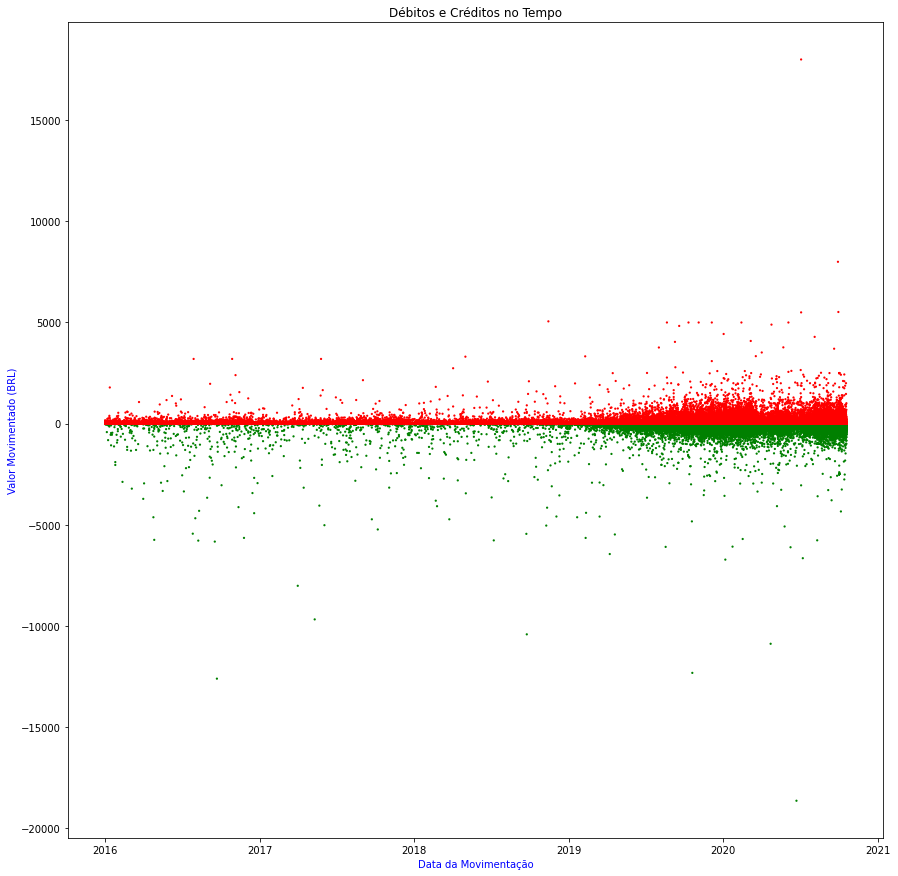

In [ ]:
df_deb = df_transacoes[(df_transacoes['DEBITO_OU_CREDITO']) == 'DEBITO'].copy()
df_cred = df_transacoes[(df_transacoes['DEBITO_OU_CREDITO']) == 'CREDITO'].copy()
grafico_dispersao(df_deb,df_cred,"DATA_DA_MOVIMENTACAO",'VALOR_MOVIMENTADO',"Débitos e Créditos no Tempo")

# **2. TRATAMENTO DE DADOS**


# **2.1 VERIFICAR TIPOS DE COLUNAS**

In [ ]:
df_clientes.dtypes

CLIENTE               int64
IDNIVEL               int64
DESCRICAO_NIVEL      object
SALDO_VC            float64
DT_MUDANCA_PEDRA     object
dtype: object

In [ ]:
df_transacoes.dtypes

CLIENTE                   int64
DEBITO_OU_CREDITO        object
TIPO_TRANSACAO_VC        object
ID_LISTA_PRESENTES        int64
PEDIDO_BOL                int64
VALOR_MOVIMENTADO       float64
SALDO                   float64
MOEDA                    object
DATA_DA_MOVIMENTACAO     object
FATURA                  float64
DATA_CRIACAO             object
LOJA                    float64
dtype: object

# **2.2 ALTERANDO TIPOS DE COLUNAS**

In [ ]:
df_transacoes[['FATURA','LOJA']] = df_transacoes[['FATURA','LOJA']].fillna(0).astype(int)
df_transacoes[['DATA_DA_MOVIMENTACAO','DATA_CRIACAO']] = df_transacoes[['DATA_DA_MOVIMENTACAO','DATA_CRIACAO']].astype('datetime64')
df_transacoes

,CLIENTE,DEBITO_OU_CREDITO,TIPO_TRANSACAO_VC,ID_LISTA_PRESENTES,PEDIDO_BOL,VALOR_MOVIMENTADO,SALDO,MOEDA,DATA_DA_MOVIMENTACAO,FATURA,DATA_CRIACAO,LOJA
0,3059785,CREDITO,CREDITO_POR_TROCO,0,0,0.37,0.37,BRL,2019-11-03,157999405,2019-11-03,118
1,197026,CREDITO,CREDITO_POR_TROCO,0,0,0.39,3.20,BRL,2017-11-20,144328614,2017-11-20,500
2,2435219,CREDITO,CREDITO_POR_TROCO,0,0,1.15,1.15,BRL,2020-08-05,163994206,2020-08-05,106
3,1736644,CREDITO,CREDITO_POR_TROCO,0,0,0.15,2.66,BRL,2017-08-20,142898316,2017-08-20,118
4,2010537,DEBITO,DEBITO_PAGAMENTO_COM_VC,0,0,-0.50,0.00,BRL,2017-08-08,0,2017-08-08,401
...,...,...,...,...,...,...,...,...,...,...,...,...
380319,1046303,CREDITO,CREDITO_POR_TROCO,0,0,0.90,0.90,BRL,2018-02-15,145954646,2018-02-15,202
380320,155516,DEBITO,DEBITO_PAGAMENTO_COM_VC,0,0,-0.20,0.75,BRL,2018-12-06,0,2018-12-06,101
380321,2087858,CREDITO,CREDITO_POR_TROCO,0,0,0.23,0.47,BRL,2018-11-27,151060807,2018-11-27,106
380322,2133650,CREDITO,CREDITO_GERADO_POR_COMPRA_DE_VC,0,0,85.00,88.35,BRL,2020-10-03,165519100,2020-10-03,520


In [ ]:
df_transacoesL = df_transacoes.copy()
df_transacoesL['TIPO_TRANSACAO_VC'] = df_transacoesL['TIPO_TRANSACAO_VC'].str.replace('_',' ')
df_transacoesL

,CLIENTE,DEBITO_OU_CREDITO,TIPO_TRANSACAO_VC,ID_LISTA_PRESENTES,PEDIDO_BOL,VALOR_MOVIMENTADO,SALDO,MOEDA,DATA_DA_MOVIMENTACAO,FATURA,DATA_CRIACAO,LOJA
0,3059785,CREDITO,CREDITO POR TROCO,0,0,0.37,0.37,BRL,2019-11-03,157999405,2019-11-03,118
1,197026,CREDITO,CREDITO POR TROCO,0,0,0.39,3.20,BRL,2017-11-20,144328614,2017-11-20,500
2,2435219,CREDITO,CREDITO POR TROCO,0,0,1.15,1.15,BRL,2020-08-05,163994206,2020-08-05,106
3,1736644,CREDITO,CREDITO POR TROCO,0,0,0.15,2.66,BRL,2017-08-20,142898316,2017-08-20,118
4,2010537,DEBITO,DEBITO PAGAMENTO COM VC,0,0,-0.50,0.00,BRL,2017-08-08,0,2017-08-08,401
...,...,...,...,...,...,...,...,...,...,...,...,...
380319,1046303,CREDITO,CREDITO POR TROCO,0,0,0.90,0.90,BRL,2018-02-15,145954646,2018-02-15,202
380320,155516,DEBITO,DEBITO PAGAMENTO COM VC,0,0,-0.20,0.75,BRL,2018-12-06,0,2018-12-06,101
380321,2087858,CREDITO,CREDITO POR TROCO,0,0,0.23,0.47,BRL,2018-11-27,151060807,2018-11-27,106
380322,2133650,CREDITO,CREDITO GERADO POR COMPRA DE VC,0,0,85.00,88.35,BRL,2020-10-03,165519100,2020-10-03,520


# **3.0 TIPOS DE TRANSACOES MAIS RECORRENTES**




In [ ]:
df_tiposTranscoes = df_transacoes.groupby(['TIPO_TRANSACAO_VC']).agg({'VALOR_MOVIMENTADO':'sum','CLIENTE':'count'})
df_tiposTranscoes  = df_tiposTranscoes.rename(columns={'CLIENTE':'N_OCORRENCIA'})
df_tiposTranscoes['MEDIA_POR_TIPO_COMPRA'] = df_tiposTranscoes['VALOR_MOVIMENTADO']/df_tiposTranscoes['N_OCORRENCIA']
df_tiposTranscoes['MEDIA_POR_TIPO_COMPRA'] =df_tiposTranscoes['MEDIA_POR_TIPO_COMPRA'].round(2)
df_tiposTranscoes['PORCENTAGEM'] = abs(df_tiposTranscoes['N_OCORRENCIA']/df_tiposTranscoes['N_OCORRENCIA'].sum())*100
df_tiposTranscoes['PORCENTAGEM']  = df_tiposTranscoes['PORCENTAGEM'].round(4)
df_tiposTranscoes  = df_tiposTranscoes.sort_values(['PORCENTAGEM'] ,ascending = [False]).reset_index(drop = False)
df_tiposTranscoes['TIPO_TRANSACAO_VC'] = df_tiposTranscoes['TIPO_TRANSACAO_VC'].str.replace('_',' ')
df_tiposTranscoes 

,TIPO_TRANSACAO_VC,VALOR_MOVIMENTADO,N_OCORRENCIA,MEDIA_POR_TIPO_COMPRA,PORCENTAGEM
0,CREDITO POR TROCO,179108.95,234875,0.76,61.7566
1,DEBITO PAGAMENTO COM VC,-1208556.11,56800,-21.28,14.9346
2,DEBITO COMPRA COM VC,-1667180.72,32591,-51.15,8.5693
3,CREDITO GERADO POR COMPRA DE VC,4529981.02,24056,188.31,6.3251
4,DEBITO AUTOMATICO PAG PRESTACOES,-2887133.12,22119,-130.53,5.8158
5,CREDITO POR COMPRA LISTA PRESENTES,927807.93,6803,136.38,1.7887
6,DEBITO DEVOLUCAO COMPRA FEITA COM VC,162004.52,1004,161.36,0.2640
7,CREDITO PREMIACAO FUNCIONARIO,90178.10,697,129.38,0.1833
8,CREDITO PREMIACAO GERENCIAL CLIENTES,26619.99,615,43.28,0.1617
9,AJUSTE CONTABIL OU LANCAM INCORRETO,37641.98,369,102.01,0.0970


# **4.1 DEBITOS MAIS FREQUENTES**


In [ ]:
df_saidasFrequentes = df_tiposTranscoes[(df_tiposTranscoes['VALOR_MOVIMENTADO']<0)].copy()
df_saidasFrequentes = df_saidasFrequentes.drop(['PORCENTAGEM'], axis = 'columns')
df_saidasFrequentes['PORCENTAGEM'] = (df_saidasFrequentes['N_OCORRENCIA']/df_saidasFrequentes['N_OCORRENCIA'].sum())*100
df_saidasFrequentes = df_saidasFrequentes.sort_values(['PORCENTAGEM'] ,ascending = [False]).reset_index(drop = False)
df_saidasFrequentes['PORCENTAGEM']  = df_saidasFrequentes['PORCENTAGEM'].round(4)
df_saidasFrequentes=df_saidasFrequentes.drop(['index'], axis = 'columns')
df_saidasFrequentes['TIPO_TRANSACAO_VC'] = df_saidasFrequentes['TIPO_TRANSACAO_VC'].str.replace('_',' ')
df_saidasFrequentes



,TIPO_TRANSACAO_VC,VALOR_MOVIMENTADO,N_OCORRENCIA,MEDIA_POR_TIPO_COMPRA,PORCENTAGEM
0,DEBITO PAGAMENTO COM VC,-1208556.11,56800,-21.28,50.8591
1,DEBITO COMPRA COM VC,-1667180.72,32591,-51.15,29.1822
2,DEBITO AUTOMATICO PAG PRESTACOES,-2887133.12,22119,-130.53,19.8055
3,TRANSFERENCIA ENTRE CLIENTES BEMOL,-5144.01,79,-65.11,0.0707
4,TRANSFERENCIA ENTRE CLIENTES BEMOL WHATSAPP,-8092.00,33,-245.21,0.0295
5,DEBITO DEVOLUCAO COMPRA DE VC,-3538.92,25,-141.56,0.0224
6,DEBITO ESTORNO LISTA PRESENTES,-4160.00,16,-260.00,0.0143
7,DEBITO POR ESTORNO TROCO,-251.22,16,-15.70,0.0143
8,DEBITO DUPLICIDADE LANCAMENTO,-61.22,1,-61.22,0.0009
9,DOACAO,-10.00,1,-10.00,0.0009


In [ ]:
print(f"Débito Mais Frequente: {df_saidasFrequentes.iloc[0]['TIPO_TRANSACAO_VC']}  Frequencia: {df_saidasFrequentes.iloc[0]['PORCENTAGEM']:.2f}%")


Débito Mais Frequente: DEBITO PAGAMENTO COM VC  Frequencia: 50.86%


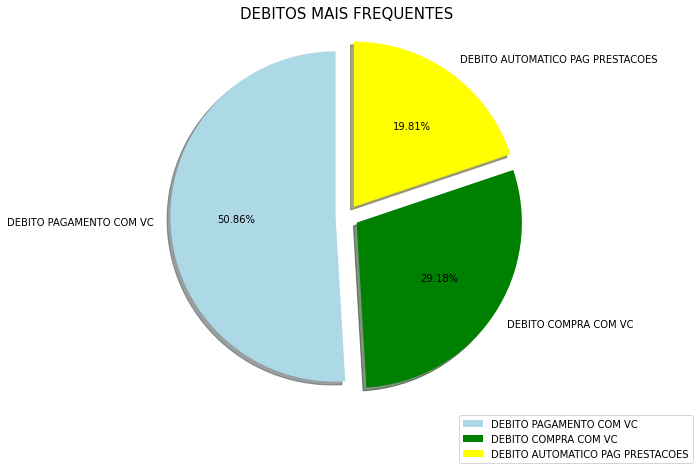

In [ ]:
df_saidasFrequentes['TIPO_TRANSACAO_VC'] = df_saidasFrequentes['TIPO_TRANSACAO_VC'].str.replace('_',' ')
plotar_grafico_pizza(df_saidasFrequentes,"PORCENTAGEM","TIPO_TRANSACAO_VC",explode=[0.07,0.07,0.07],title="DEBITOS MAIS FREQUENTES")

# **4.2 CRÉDITOS MAIS FREQUENTES**

In [ ]:
df_entradasFrequentes = df_tiposTranscoes[(df_tiposTranscoes['VALOR_MOVIMENTADO']>0)].copy()
df_entradasFrequentes = df_entradasFrequentes.drop(['PORCENTAGEM'], axis = 'columns')
df_entradasFrequentes['PORCENTAGEM'] = (df_entradasFrequentes['N_OCORRENCIA']/df_entradasFrequentes['N_OCORRENCIA'].sum())*100
df_entradasFrequentes = df_entradasFrequentes.sort_values(['PORCENTAGEM'] ,ascending = [False]).reset_index(drop = False)
df_entradasFrequentes['PORCENTAGEM']  = df_entradasFrequentes['PORCENTAGEM'].round(4)
df_entradasFrequentes=df_entradasFrequentes.drop(['index'], axis = 'columns')
df_entradasFrequentes['TIPO_TRANSACAO_VC'] = df_entradasFrequentes['TIPO_TRANSACAO_VC'].str.replace('_',' ')

df_entradasFrequentes

,TIPO_TRANSACAO_VC,VALOR_MOVIMENTADO,N_OCORRENCIA,MEDIA_POR_TIPO_COMPRA,PORCENTAGEM
0,CREDITO POR TROCO,179108.95,234875,0.76,87.4302
1,CREDITO GERADO POR COMPRA DE VC,4529981.02,24056,188.31,8.9546
2,CREDITO POR COMPRA LISTA PRESENTES,927807.93,6803,136.38,2.5324
3,DEBITO DEVOLUCAO COMPRA FEITA COM VC,162004.52,1004,161.36,0.3737
4,CREDITO PREMIACAO FUNCIONARIO,90178.10,697,129.38,0.2595
5,CREDITO PREMIACAO GERENCIAL CLIENTES,26619.99,615,43.28,0.2289
6,AJUSTE CONTABIL OU LANCAM INCORRETO,37641.98,369,102.01,0.1374
7,CREDITO GERADO DEVOLUCAO COMPRAS,21443.87,156,137.46,0.0581
8,CREDITO CONVERSAO CRED GERADO DEVOLUCAO,12705.51,52,244.34,0.0194
9,AJUSTE LANCAMENTO INCORRETO,1558.84,15,103.92,0.0056


In [ ]:
print(f"Crédito Mais Frequente: {df_entradasFrequentes.iloc[0]['TIPO_TRANSACAO_VC']}  Frequencia: {df_entradasFrequentes.iloc[0]['PORCENTAGEM']:.2f}%")


Crédito Mais Frequente: CREDITO POR TROCO  Frequencia: 87.43%


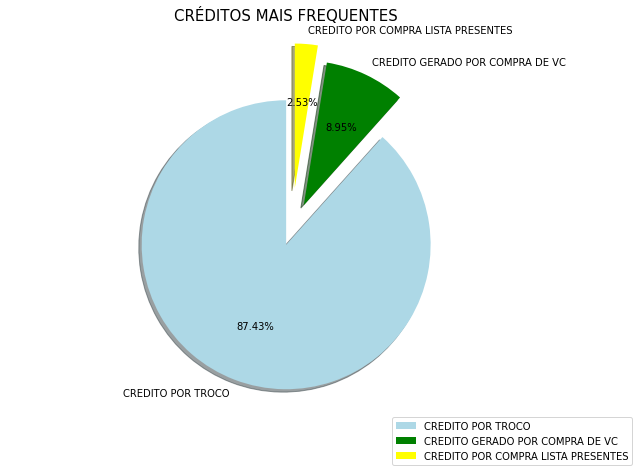

In [ ]:
df_entradasFrequentes['TIPO_TRANSACAO_VC'] = df_entradasFrequentes['TIPO_TRANSACAO_VC'].str.replace('_',' ')
plotar_grafico_pizza(df_entradasFrequentes,"PORCENTAGEM","TIPO_TRANSACAO_VC",2,explode=[0.1,0.2,0.3], title = "CRÉDITOS MAIS FREQUENTES")

# **4.2 MAIORES VOLUMES DE DEBITOS**

In [ ]:
df_saidasVolume = df_saidasFrequentes.drop(['PORCENTAGEM'], axis = 'columns').copy()
df_saidasVolume['PORCENTAGEM'] = (df_saidasVolume['VALOR_MOVIMENTADO']/df_saidasVolume['VALOR_MOVIMENTADO'].sum())*100
df_saidasVolume = df_saidasVolume.sort_values(['PORCENTAGEM'] ,ascending = [False]).reset_index(drop = False)
df_saidasVolume=df_saidasVolume.drop(['index'], axis = 'columns')
df_saidasVolume

,TIPO_TRANSACAO_VC,VALOR_MOVIMENTADO,N_OCORRENCIA,MEDIA_POR_TIPO_COMPRA,PORCENTAGEM
0,DEBITO AUTOMATICO PAG PRESTACOES,-2887133.12,22119,-130.53,49.914757
1,DEBITO COMPRA COM VC,-1667180.72,32591,-51.15,28.823375
2,DEBITO PAGAMENTO COM VC,-1208556.11,56800,-21.28,20.894355
3,TRANSFERENCIA ENTRE CLIENTES BEMOL WHATSAPP,-8092.00,33,-245.21,0.139900
4,TRANSFERENCIA ENTRE CLIENTES BEMOL,-5144.01,79,-65.11,0.088933
5,DEBITO ESTORNO LISTA PRESENTES,-4160.00,16,-260.00,0.071921
6,DEBITO DEVOLUCAO COMPRA DE VC,-3538.92,25,-141.56,0.061183
7,DEBITO POR ESTORNO TROCO,-251.22,16,-15.70,0.004343
8,DEBITO DUPLICIDADE LANCAMENTO,-61.22,1,-61.22,0.001058
9,DOACAO,-10.00,1,-10.00,0.000173


In [ ]:
print(f"Debito mais Volumoso: {df_saidasVolume.iloc[0]['TIPO_TRANSACAO_VC']}  Porcentagem do Volume Total: {df_saidasVolume.iloc[0]['PORCENTAGEM']:.2f}%")


Debito mais Volumoso: DEBITO AUTOMATICO PAG PRESTACOES  Porcentagem do Volume Total: 49.91%


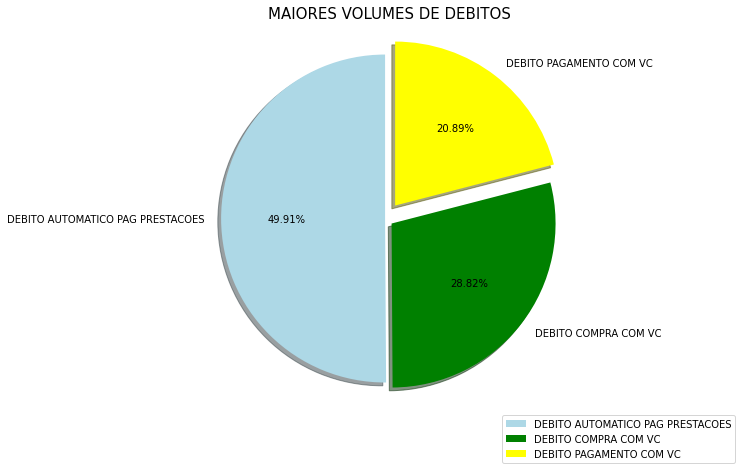

In [ ]:
df_saidasVolume['TIPO_TRANSACAO_VC'] = df_saidasVolume['TIPO_TRANSACAO_VC'].str.replace('_',' ')
plotar_grafico_pizza(df_saidasVolume,"PORCENTAGEM","TIPO_TRANSACAO_VC", title="MAIORES VOLUMES DE DEBITOS")

# **4.3 MAIORES VOLUMES DE CREDITOS**

In [ ]:
df_entradaVolume = df_entradasFrequentes.drop(['PORCENTAGEM'], axis = 'columns').copy()
df_entradaVolume['PORCENTAGEM'] = (df_entradaVolume['VALOR_MOVIMENTADO']/df_entradaVolume['VALOR_MOVIMENTADO'].sum())*100
df_entradaVolume = df_entradaVolume.sort_values(['PORCENTAGEM'] ,ascending = [False]).reset_index(drop = False)
df_entradaVolume=df_entradaVolume.drop(['index'], axis = 'columns')
df_entradaVolume['TIPO_TRANSACAO_VC'] = df_entradaVolume['TIPO_TRANSACAO_VC'].str.replace('_',' ')

df_entradaVolume

,TIPO_TRANSACAO_VC,VALOR_MOVIMENTADO,N_OCORRENCIA,MEDIA_POR_TIPO_COMPRA,PORCENTAGEM
0,CREDITO GERADO POR COMPRA DE VC,4529981.02,24056,188.31,75.637458
1,CREDITO POR COMPRA LISTA PRESENTES,927807.93,6803,136.38,15.491684
2,CREDITO POR TROCO,179108.95,234875,0.76,2.990597
3,DEBITO DEVOLUCAO COMPRA FEITA COM VC,162004.52,1004,161.36,2.705003
4,CREDITO PREMIACAO FUNCIONARIO,90178.10,697,129.38,1.505711
5,AJUSTE CONTABIL OU LANCAM INCORRETO,37641.98,369,102.01,0.628511
6,CREDITO PREMIACAO GERENCIAL CLIENTES,26619.99,615,43.28,0.444476
7,CREDITO GERADO DEVOLUCAO COMPRAS,21443.87,156,137.46,0.358050
8,CREDITO CONVERSAO CRED GERADO DEVOLUCAO,12705.51,52,244.34,0.212145
9,AJUSTE LANCAMENTO INCORRETO,1558.84,15,103.92,0.026028


In [ ]:
print(f"Crédito mais Volumoso: {df_entradaVolume.iloc[0]['TIPO_TRANSACAO_VC']}  Porcentagem do Volume Total: {df_entradaVolume.iloc[0]['PORCENTAGEM']:.2f}%")


Crédito mais Volumoso: CREDITO GERADO POR COMPRA DE VC  Porcentagem do Volume Total: 75.64%


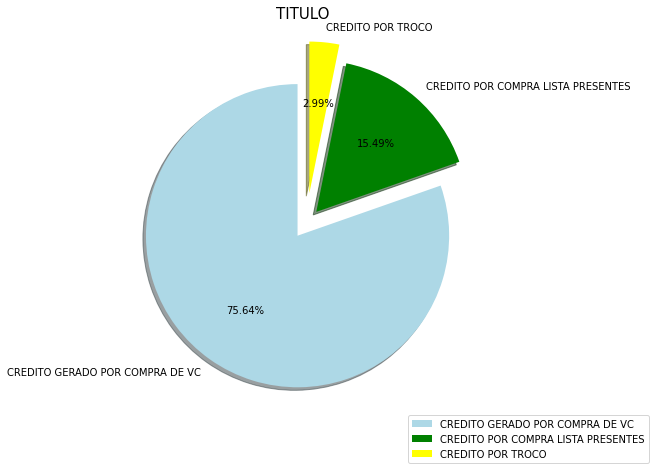

In [ ]:
plotar_grafico_pizza(df_entradaVolume,"PORCENTAGEM","TIPO_TRANSACAO_VC",explode=[0.1,0.1,0.2])

# **5.0 VALOR MÉDIO MOVIMENTADO POR PESSOA**

In [ ]:
df_agrupPessoa  = df_transacoes.copy()
df_agrupPessoa['VALOR_MOVIMENTADO'] = abs(df_agrupPessoa['VALOR_MOVIMENTADO'])
df_agrupPessoa = df_agrupPessoa.groupby(['CLIENTE']).agg({'VALOR_MOVIMENTADO':'sum','DEBITO_OU_CREDITO':'count'})
df_agrupPessoa = df_agrupPessoa.rename(columns={'DEBITO_OU_CREDITO':'N_OCORRENCIA'}).reset_index(drop = False)
print(f"Valor Médio Movimentado por pessoa: {df_agrupPessoa['VALOR_MOVIMENTADO'].sum()/df_agrupPessoa['CLIENTE'].count():.2f} BRL")
# Considerou-se que todas as operacoes realizadas por uma mesma pessoa deveriam ser somadas, e as operacoes de saída deveriam ser consideraos
#seus valores absolutos, não importando o sentido da operação.


Valor Médio Movimentado por pessoa: 49.65 BRL


# **5.1 VALOR MÉDIO MOVIMENTADO POR TRANSACAO**

In [ ]:
print(f"Valor Médio Movimentado por transação: {df_agrupPessoa['VALOR_MOVIMENTADO'].sum()/df_agrupPessoa['N_OCORRENCIA'].sum():.2f} BRL")


Valor Médio Movimentado por transação: 31.13 BRL


# **5.2 VALOR MÉDIO DE CRÉDITOS E DÉBITOS MOVIMENTADOS POR PESSOA E POR TRANSACAO**

In [ ]:
df_agrupPessoaEntradas = df_transacoes[(df_transacoes['VALOR_MOVIMENTADO']>0)].copy()
df_agrupPessoaEntradas = df_agrupPessoaEntradas.groupby(['CLIENTE']).agg({'VALOR_MOVIMENTADO':'sum','DEBITO_OU_CREDITO':'count'})
df_agrupPessoaEntradas = df_agrupPessoaEntradas.rename(columns={'DEBITO_OU_CREDITO':'N_OCORRENCIA'}).reset_index(drop = False)
print(f"Valor Médio de Crédito por pessoa: {df_agrupPessoaEntradas['VALOR_MOVIMENTADO'].sum()/df_agrupPessoaEntradas['CLIENTE'].count():.2f} BRL")
print(f"Valor Médio de Crédito por transacao: {df_agrupPessoaEntradas['VALOR_MOVIMENTADO'].sum()/df_agrupPessoaEntradas['N_OCORRENCIA'].sum():.2f} BRL")


df_agrupPessoaSaidas = df_transacoes[(df_transacoes['VALOR_MOVIMENTADO']<0)].copy()
df_agrupPessoaSaidas = df_agrupPessoaSaidas.groupby(['CLIENTE']).agg({'VALOR_MOVIMENTADO':'sum','DEBITO_OU_CREDITO':'count'})
df_agrupPessoaSaidas = df_agrupPessoaSaidas.rename(columns={'DEBITO_OU_CREDITO':'N_OCORRENCIA'}).reset_index(drop = False)
print(f"Valor Médio de Débito por pessoa: {df_agrupPessoaSaidas['VALOR_MOVIMENTADO'].sum()/df_agrupPessoaSaidas['CLIENTE'].count():.2f} BRL")
print(f"Valor Médio de Débito por transacao: {df_agrupPessoaSaidas['VALOR_MOVIMENTADO'].sum()/df_agrupPessoaSaidas['N_OCORRENCIA'].sum():.2f} BRL")

# Considerou-se que todas as operacoes realizadas por uma mesma pessoa deveriam ser somadas. Neste caso o sentido da operação importa


Valor Médio de Crédito por pessoa: 31.20 BRL
Valor Médio de Crédito por transacao: 22.41 BRL
Valor Médio de Débito por pessoa: -65.07 BRL
Valor Médio de Débito por transacao: -52.12 BRL


# **6.0 ID_LISTA_PRESENTES**


In [ ]:
df_presentes = df_transacoes.copy()
df_presentes = df_presentes.groupby([df_presentes['ID_LISTA_PRESENTES']]).agg({'DEBITO_OU_CREDITO':'count'}).reset_index(drop = False)
df_presentes = df_presentes.sort_values(['DEBITO_OU_CREDITO'] ,ascending = [False])
df_presentes = df_presentes.rename(columns={'DEBITO_OU_CREDITO':'N_OCORRENCIA'})
df_presentes= df_presentes[(df_presentes['N_OCORRENCIA'])>5].copy().reset_index(drop = False)
df_presentes = df_presentes.drop(['index'], axis = 'columns')
df_presentes= df_presentes[(df_presentes['ID_LISTA_PRESENTES'])!=0].copy()
df_presentes

,ID_LISTA_PRESENTES,N_OCORRENCIA
1,1074506,8
2,1145014,8
3,895511,7
4,984018,7
5,530523,7
6,1112022,7
7,1141026,7
8,407507,7
9,2003624,6
10,1246024,6


# **7.0 DISTRIBUICAO DOS DADOS NO TEMPO**


In [ ]:
def definir_status(credito_ou_debito,status):
  if (credito_ou_debito == status):
    return 1
  else:
    return 0

In [ ]:
df_debitoxCredito = df_transacoes.copy()
df_debitoxCredito['CREDITO'] = df_debitoxCredito.apply(lambda row: definir_status(row['DEBITO_OU_CREDITO'],'CREDITO'), axis = 'columns')
df_debitoxCredito['DEBITO'] = df_debitoxCredito.apply(lambda row: definir_status(row['DEBITO_OU_CREDITO'],'DEBITO'), axis = 'columns')
df_debitoxCredito = df_debitoxCredito.groupby([df_debitoxCredito['DATA_DA_MOVIMENTACAO'].dt.year]).agg({'CREDITO':'sum','DEBITO':'sum' }).reset_index(drop = False).copy()
df_debitoxCredito['PORCENTAGEM_DEBITO'] = (df_debitoxCredito['DEBITO']*100/(df_debitoxCredito['CREDITO'] + df_debitoxCredito['DEBITO'] )).round(2)
df_debitoxCredito['PORCENTAGEM_CREDITO'] = (df_debitoxCredito['CREDITO']*100/(df_debitoxCredito['CREDITO'] + df_debitoxCredito['DEBITO'] )).round(2)

df_debitoxCredito


#Ocorrencias de Creditos e Debitos ao Longo dos anos

,DATA_DA_MOVIMENTACAO,CREDITO,DEBITO,PORCENTAGEM_DEBITO,PORCENTAGEM_CREDITO
0,2016,29720,5817,16.37,83.63
1,2017,43539,13042,23.05,76.95
2,2018,58173,22354,27.76,72.24
3,2019,74815,31415,29.57,70.43
4,2020,62451,38998,38.44,61.56


No handles with labels found to put in legend.


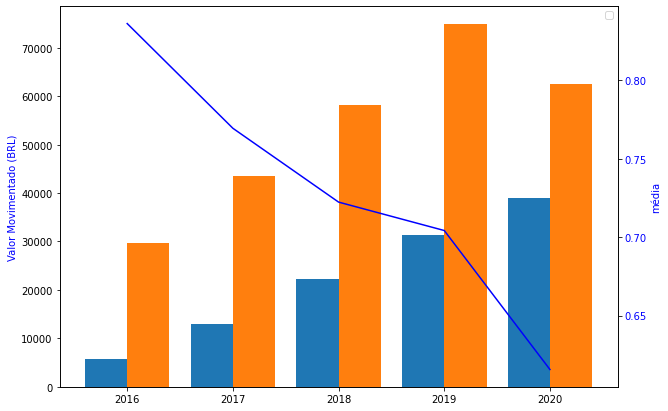

In [ ]:
grafico_barras(df_debitoxCredito, 'DATA_DA_MOVIMENTACAO', 'CREDITO','DEBITO')

# **7.1 FREQUENCIA DOS DEBITOS ANO A ANO** **

In [ ]:
df_debitoV = df_transacoes[(df_transacoes['VALOR_MOVIMENTADO']<0)].copy()
df_debitoV['DATA_DA_MOVIMENTACAO'] = df_debitoV['DATA_DA_MOVIMENTACAO'].dt.year
df_debitoV['2016'] = df_debitoV.apply(lambda row: definir_status(row['DATA_DA_MOVIMENTACAO'],2016), axis = 'columns')
df_debitoV['2017'] = df_debitoV.apply(lambda row: definir_status(row['DATA_DA_MOVIMENTACAO'],2017), axis = 'columns')
df_debitoV['2018'] = df_debitoV.apply(lambda row: definir_status(row['DATA_DA_MOVIMENTACAO'],2018), axis = 'columns')
df_debitoV['2019'] = df_debitoV.apply(lambda row: definir_status(row['DATA_DA_MOVIMENTACAO'],2019), axis = 'columns')
df_debitoV['2020'] = df_debitoV.apply(lambda row: definir_status(row['DATA_DA_MOVIMENTACAO'],2020), axis = 'columns')
df_tipoDebito = df_debitoV.copy()
df_amostra = df_debitoV.copy()

df_debitoV = df_debitoV.groupby([df_debitoV['TIPO_TRANSACAO_VC']]).agg({'2016':'sum','2017':'sum','2018':'sum','2019':'sum','2020':'sum'})
df_debitoV['TOTAL'] = df_debitoV['2020'] + df_debitoV['2019'] +df_debitoV['2018'] + df_debitoV['2017'] + df_debitoV['2016']
df_debitoV = df_debitoV.sort_values(['TOTAL'] ,ascending = [False]).reset_index(drop = False).copy()
df_debitoV['TIPO_TRANSACAO_VC'] = df_debitoV['TIPO_TRANSACAO_VC'].str.replace('_',' ')
df_debitoV
#  TODOS OS TIPOS DE DEBITOS ANO A ANO - analisados pela frequencia do acontecimento

,TIPO_TRANSACAO_VC,2016,2017,2018,2019,2020,TOTAL
0,DEBITO PAGAMENTO COM VC,4032,8500,14325,18134,11809,56800
1,DEBITO COMPRA COM VC,1782,4538,8019,9485,8767,32591
2,DEBITO AUTOMATICO PAG PRESTACOES,0,0,0,3781,18338,22119
3,TRANSFERENCIA ENTRE CLIENTES BEMOL,0,0,0,0,43,43
4,DEBITO DEVOLUCAO COMPRA DE VC,0,0,0,3,16,19
5,TRANSFERENCIA ENTRE CLIENTES BEMOL WHATSAPP,0,0,0,0,19,19
6,DEBITO ESTORNO LISTA PRESENTES,3,1,3,5,4,16
7,DEBITO POR ESTORNO TROCO,0,3,7,5,1,16
8,AJUSTE CONTABIL OU LANCAM INCORRETO,0,0,0,1,0,1
9,DEBITO DEVOLUCAO COMPRA FEITA COM VC,0,0,1,0,0,1


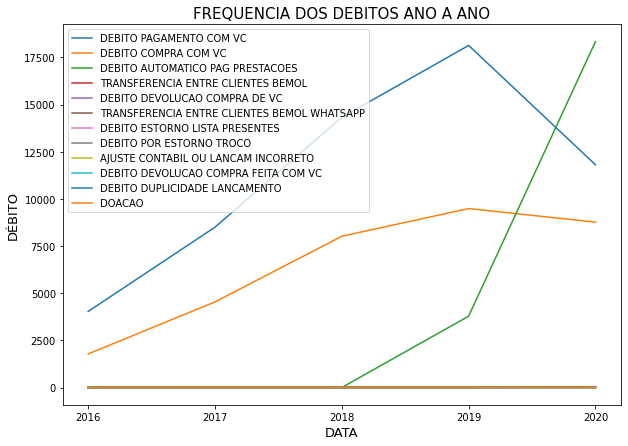

In [ ]:
grafico_linhas(df_debitoV,"FREQUENCIA DOS DEBITOS ANO A ANO","DATA","DÉBITO")

# **7.2 TOTAL DOS DEBITOS ANO A ANO**

In [ ]:
def retornar_movimentacao(ano, movimentacao):
  if (ano == 1):
    return abs(movimentacao)
  else:
    return 0

In [ ]:
df_tipoDebito['2016'] = df_tipoDebito.apply(lambda row: retornar_movimentacao(row['2016'],row['VALOR_MOVIMENTADO']), axis = 'columns')
df_tipoDebito['2017'] = df_tipoDebito.apply(lambda row: retornar_movimentacao(row['2017'],row['VALOR_MOVIMENTADO']), axis = 'columns')
df_tipoDebito['2018'] = df_tipoDebito.apply(lambda row: retornar_movimentacao(row['2018'],row['VALOR_MOVIMENTADO']), axis = 'columns')
df_tipoDebito['2019'] = df_tipoDebito.apply(lambda row: retornar_movimentacao(row['2019'],row['VALOR_MOVIMENTADO']), axis = 'columns')
df_tipoDebito['2020'] = df_tipoDebito.apply(lambda row: retornar_movimentacao(row['2020'],row['VALOR_MOVIMENTADO']), axis = 'columns')
df_amostra3 = df_tipoDebito.copy()
df_tipoDebito = df_tipoDebito.groupby([df_tipoDebito['TIPO_TRANSACAO_VC']]).agg({'2016':'sum','2017':'sum','2018':'sum','2019':'sum','2020':'sum'})
df_tipoDebito['TOTAL'] = df_tipoDebito['2020'] + df_tipoDebito['2019'] +df_tipoDebito['2018'] + df_tipoDebito['2017'] + df_tipoDebito['2016']


In [ ]:
df_tipoDebito = df_tipoDebito.sort_values(['TOTAL'] ,ascending = [False]).reset_index(drop = False).copy()
df_tipoDebito['TIPO_TRANSACAO_VC'] = df_tipoDebito['TIPO_TRANSACAO_VC'].str.replace('_',' ')
df_tipoDebito

,TIPO_TRANSACAO_VC,2016,2017,2018,2019,2020,TOTAL
0,DEBITO AUTOMATICO PAG PRESTACOES,0.00,0.00,0.00,620507.38,2266625.74,2887133.12
1,DEBITO COMPRA COM VC,256618.35,189242.25,218930.90,380293.88,622095.34,1667180.72
2,DEBITO PAGAMENTO COM VC,6619.75,11417.29,18855.93,684022.73,487640.41,1208556.11
3,TRANSFERENCIA ENTRE CLIENTES BEMOL WHATSAPP,0.00,0.00,0.00,0.00,27891.00,27891.00
4,TRANSFERENCIA ENTRE CLIENTES BEMOL,0.00,0.00,0.00,0.00,18299.60,18299.60
5,DEBITO ESTORNO LISTA PRESENTES,997.00,79.00,165.00,2147.00,772.00,4160.00
6,DEBITO DEVOLUCAO COMPRA DE VC,0.00,0.00,0.00,153.00,3883.49,4036.49
7,DEBITO POR ESTORNO TROCO,0.00,113.03,93.88,24.31,20.00,251.22
8,AJUSTE CONTABIL OU LANCAM INCORRETO,0.00,0.00,0.00,65.00,0.00,65.00
9,DEBITO DUPLICIDADE LANCAMENTO,0.00,0.00,0.00,61.22,0.00,61.22


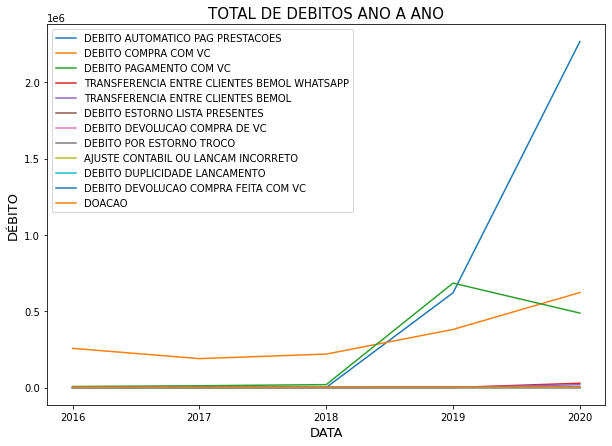

In [ ]:
grafico_linhas(df_tipoDebito,"TOTAL DE DEBITOS ANO A ANO","DATA","DÉBITO")

# **8.0 AMOSTRA TABELA 2 - AVALIAÇÃO DO NÍVEL DO CLIENTE **

Frenquencia de Débitos

In [ ]:
df_amostra2 = pd.merge(df_amostra, df_clientes, on =['CLIENTE'], how = 'left' )
df_amostra2['DESCRICAO_NIVEL'] = df_amostra2['DESCRICAO_NIVEL'].fillna('vazio')
df_amostra2 = df_amostra2[(df_amostra2['DESCRICAO_NIVEL'])!='vazio'].copy()
df_amostra2.sort_values(['CLIENTE'] ,ascending = [False])
df_amostra2 = df_amostra2.groupby([df_amostra2['DESCRICAO_NIVEL']]).agg({'2016':'sum','2017':'sum','2018':'sum','2019':'sum','2020':'sum'}).reset_index(drop = False)
df_amostra2['TOTAL'] = df_amostra2['2020'] + df_amostra2['2019'] +df_amostra2['2018'] + df_amostra2['2017'] + df_amostra2['2016']
df_amostra2 = df_amostra2.sort_values(['TOTAL'], ascending =[False] )
df_amostra2 = df_amostra2.reset_index(drop = False)
df_amostra2 = df_amostra2.drop(['index'], axis = 'columns')
df_amostra2

,DESCRICAO_NIVEL,2016,2017,2018,2019,2020,TOTAL
0,DIAMANTE+,15,33,58,70,122,298
1,DIAMANTE,12,19,20,58,80,189
2,OURO,0,5,5,18,46,74
3,PRATA,0,0,1,4,20,25
4,AZUL,0,0,0,0,5,5


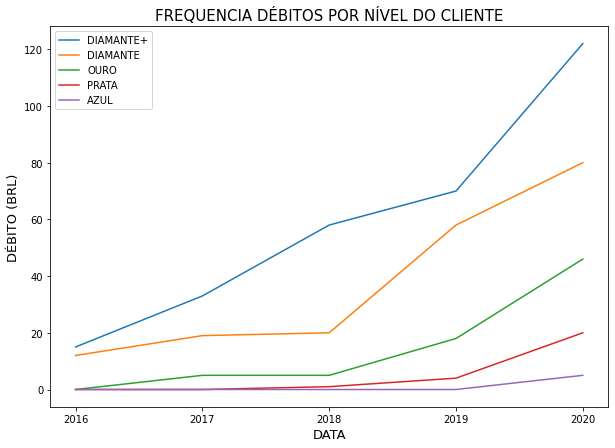

In [ ]:
grafico_linhas(df_amostra2,"FREQUENCIA DÉBITOS POR NÍVEL DO CLIENTE","DATA","DÉBITO (BRL)")

In [ ]:
df_amostra4 = pd.merge(df_amostra3, df_clientes, on =['CLIENTE'], how = 'left' )
df_amostra4['DESCRICAO_NIVEL'] = df_amostra4['DESCRICAO_NIVEL'].fillna('vazio')
df_amostra4 = df_amostra4[(df_amostra4['DESCRICAO_NIVEL'])!='vazio'].copy()
df_amostra4.sort_values(['CLIENTE'] ,ascending = [False])
df_amostra4 = df_amostra4.groupby([df_amostra4['DESCRICAO_NIVEL']]).agg({'2016':'sum','2017':'sum','2018':'sum','2019':'sum','2020':'sum'}).reset_index(drop = False)
df_amostra4['TOTAL'] = df_amostra4['2020'] + df_amostra4['2019'] +df_amostra4['2018'] + df_amostra4['2017'] + df_amostra4['2016']
df_amostra4 = df_amostra4.sort_values(['TOTAL'], ascending =[False] )
df_amostra4 = df_amostra4.reset_index(drop = False)
df_amostra4 = df_amostra4.drop(['index'], axis = 'columns')
df_amostra4

,DESCRICAO_NIVEL,2016,2017,2018,2019,2020,TOTAL
0,DIAMANTE,221.20,17.09,17.53,4212.99,14538.37,19007.18
1,DIAMANTE+,29.46,27.00,198.92,4477.89,9726.55,14459.82
2,OURO,0.00,3.08,59.63,1072.55,4634.62,5769.88
3,PRATA,0.00,0.00,0.25,2.39,1946.05,1948.69
4,AZUL,0.00,0.00,0.00,0.00,795.89,795.89


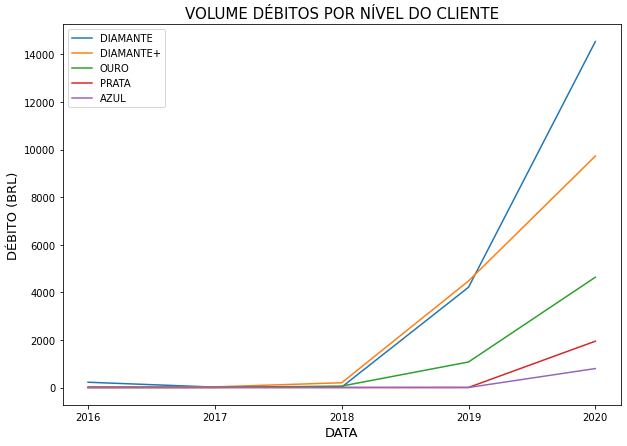

In [ ]:
grafico_linhas(df_amostra4,"VOLUME DÉBITOS POR NÍVEL DO CLIENTE","DATA","DÉBITO (BRL)")

# **9.0 TICKET MÉDIO AMOSTRA**

In [ ]:
df_nivel = pd.merge(df_transacoes, df_clientes, on =['CLIENTE'], how = 'left' )
df_nivel['DESCRICAO_NIVEL'] = df_nivel['DESCRICAO_NIVEL'].fillna('vazio')
df_nivel = df_nivel[(df_nivel['DESCRICAO_NIVEL'])!='vazio'].copy()
df_nivel.sort_values(['CLIENTE'] ,ascending = [False])
df_nivel = df_nivel.drop(['DEBITO_OU_CREDITO','ID_LISTA_PRESENTES','PEDIDO_BOL','SALDO','MOEDA','FATURA','DATA_CRIACAO','LOJA','IDNIVEL','DT_MUDANCA_PEDRA'], axis = 'columns')
df_ticket = df_nivel.groupby([df_nivel['DESCRICAO_NIVEL']]).agg({'SALDO_VC':'sum','DATA_DA_MOVIMENTACAO':'count'}).reset_index(drop = False).copy()
df_ticket = df_ticket.rename(columns={'DATA_DA_MOVIMENTACAO':'N_OCORRENCIA'})
df_ticket['TICKET_MEDIO'] = (df_ticket['SALDO_VC'] / df_ticket['N_OCORRENCIA']).round(2)
df_ticket = df_ticket.sort_values(['TICKET_MEDIO'] ,ascending = [False]).reset_index(drop = False)
df_ticket=df_ticket.drop(['index'], axis = 'columns')
df_ticket

,DESCRICAO_NIVEL,SALDO_VC,N_OCORRENCIA,TICKET_MEDIO
0,AZUL,552.34,12,46.03
1,DIAMANTE+,27322.23,854,31.99
2,DIAMANTE,13049.63,498,26.20
3,PRATA,1096.14,92,11.91
4,OURO,2411.67,222,10.86


In [ ]:
print(f"Valor Ticket Médio Total Amostra: {df_ticket['SALDO_VC'].sum()/df_ticket['N_OCORRENCIA'].sum():.2f} BRL")

Valor Ticket Médio Total Amostra: 26.48 BRL


In [ ]:
df_nivel

,CLIENTE,TIPO_TRANSACAO_VC,VALOR_MOVIMENTADO,DATA_DA_MOVIMENTACAO,DESCRICAO_NIVEL,SALDO_VC
160,1795728,CREDITO_POR_TROCO,0.13,2019-08-03,DIAMANTE+,1.09
206,1376141,CREDITO_POR_TROCO,0.70,2020-01-02,DIAMANTE,6.53
363,326711,CREDITO_POR_TROCO,0.53,2019-05-09,DIAMANTE+,2.16
683,326711,DEBITO_AUTOMATICO_PAG_PRESTACOES,-276.33,2019-12-10,DIAMANTE+,2.16
941,100916,CREDITO_POR_TROCO,0.78,2019-10-12,DIAMANTE,6.03
...,...,...,...,...,...,...
379246,1634009,CREDITO_GERADO_POR_COMPRA_DE_VC,200.00,2019-09-30,DIAMANTE+,251.07
379304,140895,CREDITO_POR_TROCO,0.15,2018-02-27,DIAMANTE,2.83
379686,1796883,CREDITO_PREMIACAO_FUNCIONARIO,40.00,2020-01-21,DIAMANTE,0.00
380189,315364,CREDITO_GERADO_POR_COMPRA_DE_VC,220.00,2019-07-07,DIAMANTE+,49.77


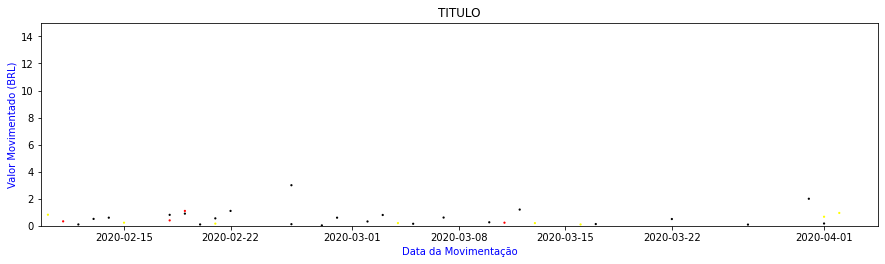

In [ ]:
import datetime
fig = plt.figure(figsize=(15,20))
axes = fig.add_subplot(111)



diamanteCred =[]
dataDiamanteCred = []
diamanteDeb = []
dataDiamanteDeb = []

diamanteplusCred =[]
dataDiamanteplusCred = []
diamanteplusDeb = []
dataDiamanteplusDeb = []

ouroCred =[]
dataOuroCred =[]
ouroDeb = []
dataOuroDeb = []

prataCred =[]
dataPrataCred =[]
prataDeb = []
dataPrataDeb = []

azulCred =[]
dataAzulCred = []
azulDeb =[]
dataAzulDeb = []

todasLinhas = df_nivel.values.tolist()
for linha in todasLinhas:
  if linha[4] == "DIAMANTE":
    if linha[2] > 0:
      diamanteCred.append(linha[2])
      dataDiamanteCred.append(linha[3])
    else:
      diamanteDeb.append(linha[2])
      dataDiamanteDeb.append(linha[3])
  elif linha[4] == "DIAMANTE+":
    if linha[2] > 0:
      diamanteplusCred.append(linha[2])
      dataDiamanteplusCred.append(linha[3])
    else:
      diamanteplusDeb.append(linha[2])
      dataDiamanteplusDeb.append(linha[3])
  elif linha[4] == "OURO":
    if linha[2] > 0:
      ouroCred.append(linha[2])
      dataOuroCred.append(linha[3])
    else:
      ouroDeb.append(linha[2])
      dataOuroDeb.append(linha[3])
  elif linha[4] == "PRATA":
    if linha[2] > 0:
      prataCred.append(linha[2])
      dataPrataCred.append(linha[3])
    else:
      prataDeb.append(linha[2])
      dataPrataDeb.append(linha[3])
  else:
    if linha[2] > 0:
      azulCred.append(linha[2])
      dataAzulCred.append(linha[3])
    else:
      azulDeb.append(linha[2])
      dataAzulDeb.append(linha[3])
#------------------------------------------------------------
explode = []
        
# cria rótulo no eixo x
axes.set_xlabel( 'Data da Movimentação', color='b')
# cria rótulo no eixo y
axes.set_ylabel( 'Valor Movimentado (BRL)', color='b') 
# Cria um título para o gráfico
axes.set_title('TITULO') 

#PRIMEIRO GRÁFICO
axes.scatter(dataDiamanteCred,diamanteCred,color='red',s=5,edgecolor='none')
#deixa os eixos quadrados
axes.set_aspect(1./axes.get_data_ratio()) 


#SEGUNDO GRÁFICO
axes.scatter(dataDiamanteplusCred,diamanteplusCred,color='black',s=5,edgecolor='none')
#deixa os eixos quadrados
axes.set_aspect(1./axes.get_data_ratio())


#TERCEIRO GRÁFICO
axes.scatter(dataOuroCred,ouroCred,color='yellow',s=5,edgecolor='none')
#deixa os eixos quadrados
axes.set_aspect(1./axes.get_data_ratio())


#QUARTO GRÁFICO
axes.scatter(dataAzulCred,azulCred,color='blue',s=5,edgecolor='none')
#deixa os eixos quadrados
axes.set_aspect(1./axes.get_data_ratio()) 

plt.xlim(
    xmin=datetime.datetime(2020, 2, 9, hour=13),
    xmax=datetime.datetime(2020, 4, 4, hour=13)
)
plt.ylim(ymax = 15, ymin = 0)
plt.show()

